### signal minus control to reveal filaments

In [1]:
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.cosmology import Planck18 as cosmo
from tqdm.notebook import tqdm
from helper import preprocess_catalog_galactic
from helper import load_catalog
from helper import symmetrize_map


✅ Filament map saved with shape (100, 100)


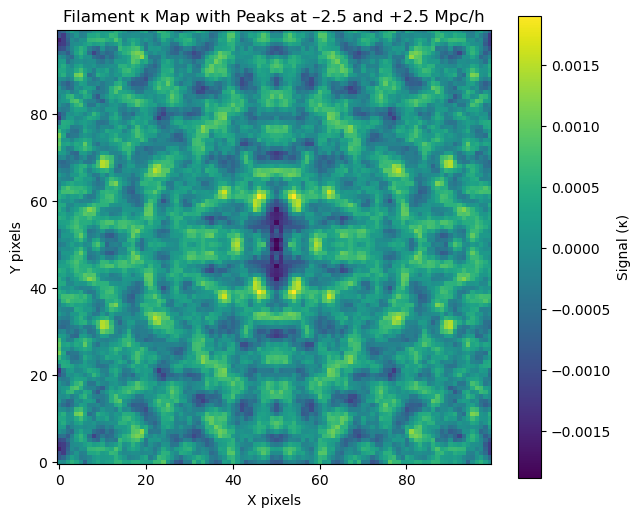

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

separation = 5

# --- Load CSVs ---
signal = pd.read_csv(f"data/kappa_sym_{separation}_BOSS_NGCSGC.csv", index_col=0).values
center = pd.read_csv("data/kappa_control_original_BOSS_North.csv", index_col=0).values

box_size_hmpc = 100.0
h = cosmo.h
grid_size = 100
cell_size_hmpc = box_size_hmpc / grid_size

# --- Make Control Pair Map (±10 Mpc/h peaks) ---
shift_hmpc = separation/2
shift_pix = int(np.round(shift_hmpc / cell_size_hmpc))  # convert to pixels

# Take the single-galaxy stacked κ map (already symmetrized if desired)
base_map = center  # or kappa_smooth or kappa_sub, depending on what you want

# Shift left and right
map_left  = np.roll(base_map, -shift_pix, axis=1)  # shift to -10 Mpc/h
map_right = np.roll(base_map, +shift_pix, axis=1)  # shift to +10 Mpc/h

# Add them up to create a control "pair" map
control = map_left + map_right

# --- Crop to same shape if needed ---
min_size = min(signal.shape[0], control.shape[0])
signal = signal[:min_size, :min_size]
control = control[:min_size, :min_size]

# --- Subtract ---
filaments = signal  - control

# --- Save to CSV ---
# pd.DataFrame(filaments).to_csv(f"filaments_map_BOSS_{separation}_NS.csv", header=False, index=False)
# print(f"✅ Filament map saved with shape {filaments.shape}")

# --- Plot ---
plt.figure(figsize=(7, 6))
im = plt.imshow(filaments, origin="lower", cmap="viridis")
plt.colorbar(im, label="Signal (κ)")
plt.title(f"Filament κ Map with Peaks at –{separation/2} and +{separation/2} Mpc/h")
plt.xlabel("X pixels")
plt.ylabel("Y pixels")
plt.show()

In [3]:
if separation == 5:
    pd.DataFrame(signal).to_csv(r"data/signal_map_BOSS_5_NS.csv", index=True)
elif separation == 10:
    pd.DataFrame(signal).to_csv(r"data/signal_map_BOSS_10_NS.csv", index=True)
elif separation == 20:
    pd.DataFrame(filaments).to_csv(r"data/signal_map_BOSS_20_NS.csv", index=True)

In [4]:
# --- Plot symmetrized map ---
# kappa_sym = symmetrize_map(filaments)

# box_size_hmpc = 100.0 # Mpc/h
# grid_size = 100
# cell_size_hmpc = box_size_hmpc / grid_size
# half_box_hmpc = box_size_hmpc / 2
# extent = [-half_box_hmpc, half_box_hmpc, -half_box_hmpc, half_box_hmpc]

# plt.imshow(kappa_sym, origin='lower', extent=extent, cmap='viridis')
# plt.colorbar(label='κ')
# plt.xlabel("Galactic l offset (h⁻¹ Mpc)")
# plt.ylabel("Galactic b offset (h⁻¹ Mpc)")
# plt.title("Symmetrized κ Map - Filament Signal (Signal – Control)")
# plt.show()

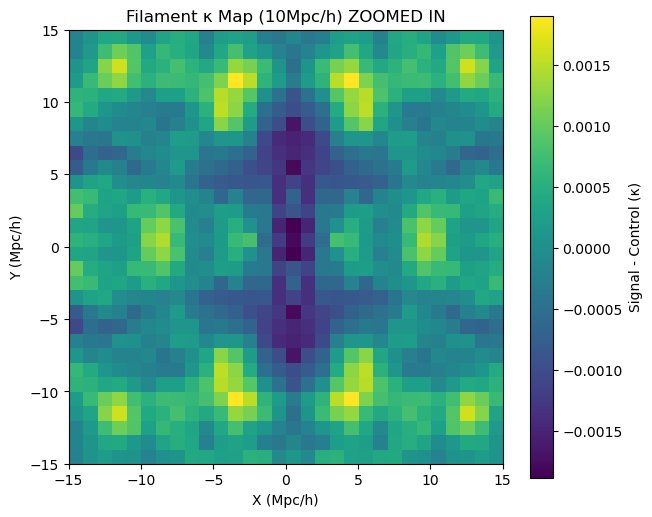

In [5]:
import numpy as np

# Define zoom fraction (e.g., 0.2 for 20%)
zoom_frac = 0.3
n = filaments.shape[0]
start = int(n * (0.5 - zoom_frac / 2))
end = int(n * (0.5 + zoom_frac / 2))

# Slice the array
filaments = signal - control
filaments_zoom = filaments[start:end, start:end]

# Adjust extent for zoomed region
xmin = -box_size_hmpc/2 + start * cell_size_hmpc
xmax = -box_size_hmpc/2 + end * cell_size_hmpc
ymin = -box_size_hmpc/2 + start * cell_size_hmpc
ymax = -box_size_hmpc/2 + end * cell_size_hmpc

plt.figure(figsize=(7, 6))
im = plt.imshow(filaments_zoom, origin="lower", cmap="viridis", extent=[xmin, xmax, ymin, ymax])
plt.colorbar(im, label="Signal - Control (κ)")
plt.title("Filament κ Map (10Mpc/h) ZOOMED IN")
plt.xlabel("X (Mpc/h)")
plt.ylabel("Y (Mpc/h)")
plt.show()